Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, precision_recall_curve, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

Load and preprocess the data

In [ ]:
bank_data = pd.read_csv('/content/bank.csv', sep=';')
bank_data['content'] = bank_data['job'] + ' ' + bank_data['marital'] + ' ' + bank_data['education'] + ' ' + bank_data['default'] + ' ' + bank_data['housing'] + ' ' + bank_data['loan'] + ' ' + bank_data['contact'] + ' ' + bank_data['month'] + ' ' + bank_data['poutcome']
bank_data['target'] = bank_data['y'].apply(lambda x: 1 if x == 'yes' else 0)

FileNotFoundError: [Errno 2] No such file or directory: '/content/bank.csv'

In [ ]:
target_distribution = bank_data['y'].value_counts(normalize=True)
print(target_distribution)

y
no     0.88476
yes    0.11524
Name: proportion, dtype: float64


Number of Rows and Columns in Dataset

In [ ]:
bank_data.shape

(4521, 19)

Checking for missing value in Dataset

In [ ]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
content      0
target       0
dtype: int64

In [ ]:
bank_data.age
plt.show()

The Count plot for the 'y' column

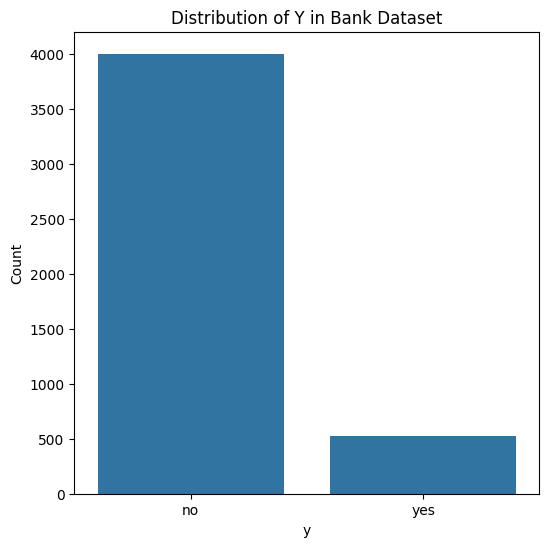

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data=bank_data, x='y')
plt.title('Distribution of Y in Bank Dataset')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

In [ ]:
bank_data['y'].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

In [ ]:
class LogisticRegressionClassifier():
    def __init__(self, learning_rate=0.001, no_of_iterations=1000):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self, X, Y, class_weights=None):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        self.class_weights = class_weights if class_weights else {0: 1, 1: 1}
        self.train_accuracies = []

        for i in range(self.no_of_iterations):
            self.update_weights()
            if i % 100 == 0:  # Calculate accuracy every 100 iterations
                y_train_pred = self.predict(self.X)
                self.train_accuracies.append(accuracy_score(self.Y, y_train_pred))

    def update_weights(self):
        linear_model = np.dot(self.X, self.w) + self.b
        y_pred = self.sigmoid(linear_model)

        weight_0 = self.class_weights[0]
        weight_1 = self.class_weights[1]

        dw = (1 / self.m) * np.dot(self.X.T, (y_pred - self.Y) * np.where(self.Y == 0, weight_0, weight_1))
        db = (1 / self.m) * np.sum((y_pred - self.Y) * np.where(self.Y == 0, weight_0, weight_1))

        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * db

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict_proba(self, X):
        linear_model = np.dot(X, self.w) + self.b
        return self.sigmoid(linear_model)

    def predict(self, X):
        y_pred = self.predict_proba(X)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        return y_pred_class

class distribution

In [ ]:
bank_data['content'] = bank_data['job'] + ' ' + bank_data['marital'] + ' ' + bank_data['education'] + ' ' + bank_data['default'] + ' ' + bank_data['housing'] + ' ' + bank_data['loan'] + ' ' + bank_data['contact'] + ' ' + bank_data['month'] + ' ' + bank_data['poutcome']
bank_data['target'] = bank_data['y'].apply(lambda x: 1 if x == 'yes' else 0)

Convert target to binary

In [ ]:
x = bank_data['content']
y = bank_data['target']

vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(x).toarray()

Convert sparse matrix to dense

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

Calculate class weights to handle imbalance

In [ ]:
class_weights = {
    0: len(Y_train) / (2 * np.bincount(Y_train)[0]),  # For class 0
    1: len(Y_train) / (2 * np.bincount(Y_train)[1])   # For class 1
}

Train the logistic regression classifier

In [ ]:
classifier = LogisticRegressionClassifier(learning_rate=0.001, no_of_iterations=1000)
classifier.fit(X_train, Y_train, class_weights=class_weights)

 Predict on train and test data

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score on training data = ', training_data_accuracy)
print('Classification report on training data = ')
print(classification_report(Y_train, X_train_prediction))

X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score on test data = ', test_data_accuracy)
print('Classification report on test data = ')
print(classification_report(Y_test, X_test_prediction))

Accuracy score on training data =  0.7898230088495575
Classification report on training data = 
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      3186
           1       0.27      0.46      0.34       430

    accuracy                           0.79      3616
   macro avg       0.60      0.65      0.61      3616
weighted avg       0.84      0.79      0.81      3616

Accuracy score on test data =  0.8033149171270718
Classification report on test data = 
              precision    recall  f1-score   support

           0       0.94      0.84      0.88       814
           1       0.25      0.48      0.33        91

    accuracy                           0.80       905
   macro avg       0.59      0.66      0.61       905
weighted avg       0.87      0.80      0.83       905



In [ ]:
input_data = "student single secondary no no no cellular apr unknown"

#"services married secondary no yes yes cellular may failure"
#"student single secondary no no no cellular apr unknown"

input_data_vectorized = vectorizer.transform([input_data]).toarray()

prediction = classifier.predict(input_data_vectorized)
print(f"The person is likely to {'yes' if prediction[0] == 1 else 'no'}")

The person is likely to yes


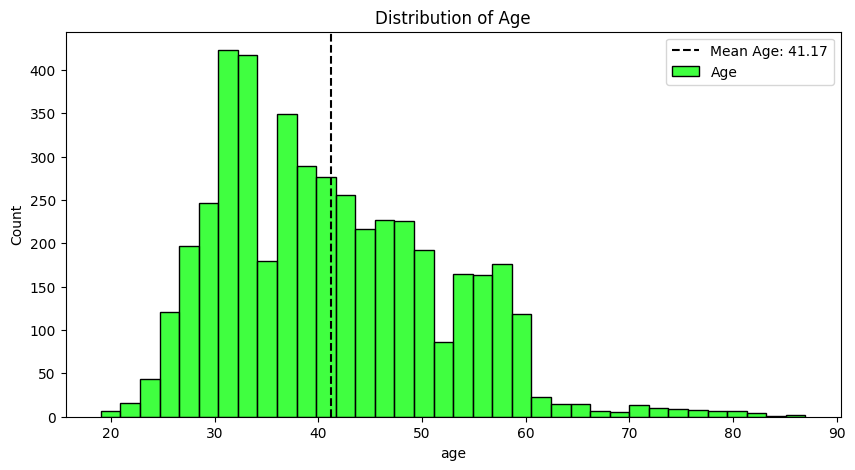

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x=bank_data['age'],color='Lime',label='Age')
plt.axvline(x=bank_data['age'].mean(),color='k',linestyle ="--",label='Mean Age: {}'.format(round(bank_data['age'].mean(),2)))
plt.legend()

plt.title('Distribution of Age')
plt.show()